In [1]:
%pip install matplotlib pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = np.genfromtxt('datasets/ngc3741data/test.cat', usecols=(3),dtype=float, names=('sum'))
instmag = -2.5*np.log10(data['sum']/720)

/var/folders/p8/2qpn3ldx4s58gvbc0c41f6g80000gn/T/ipykernel_60677/3197257987.py:2: RuntimeWarning: invalid value encountered in log10
  instmag = -2.5*np.log10(data['sum']/720)


[3.10613834e-17 4.20694998e-17 2.59982966e-17 2.56271063e-17
 1.12970356e-17 1.66575328e-17 2.90571134e-17 3.68056002e-17
 2.49479380e-17 4.81068242e-17 3.93416076e-17 1.57902600e-16
 2.64972573e-15 2.79492130e-16 1.11825032e-17 7.14713631e-17
 3.49856617e-17 3.43437664e-17 1.58330745e-17 6.35218701e-16
 1.89329660e-17 6.71725509e-17 4.92179106e-16 1.92461777e-15
 4.81628696e-15 3.74379088e-15 1.86205992e-15 2.90965056e-16
 1.85317841e-17 2.99817277e-16 3.88916687e-16 7.03781542e-16
 2.16895326e-17 2.11241664e-15 3.48129217e-17 2.87480758e-15
 5.04679365e-16 2.96822553e-16 3.04265689e-16 1.00546204e-15
 9.22971095e-16 4.49834777e-16 5.62083587e-14 1.98013343e-14
 3.16699292e-14 6.68482562e-15 2.30192020e-17 2.25440542e-15
 1.75657945e-17 2.28732032e-17 2.09565669e-16            nan
 2.76928988e-17 2.50165701e-17 3.30470956e-16 5.37690132e-17
 1.02530706e-15 4.59586531e-15 7.55903615e-15 1.18291168e-14
 1.34387057e-15 1.68560904e-16 1.55420075e-15 2.20655985e-17
 4.38079977e-17 3.227422

(0.0, 10.0)

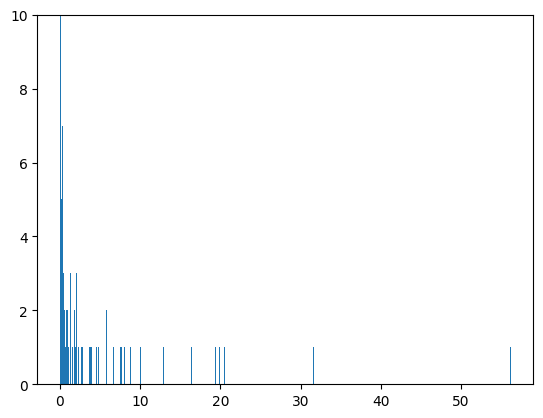

In [11]:
#zp correction; first correct for filter function (assumes a gaussian filter)
filt_fwhm = 80
a0 = 21.565
filter_func=0.5*np.sqrt(np.pi/np.log(2.)) * filt_fwhm
zp=a0 - 2.5*np.log10(filter_func)
aemag = instmag+ zp

#  convert from magnitudes to fluxes
fluxlog =-(aemag +21.48)/2.5
flux=10**(fluxlog)
print(flux)
plt.hist(flux*10**15,bins=500)
plt.ylim(0,10)